In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/github/AlgoTrading/Part3_Materials/five_minute.csv", parse_dates=["time"], index_col="time")

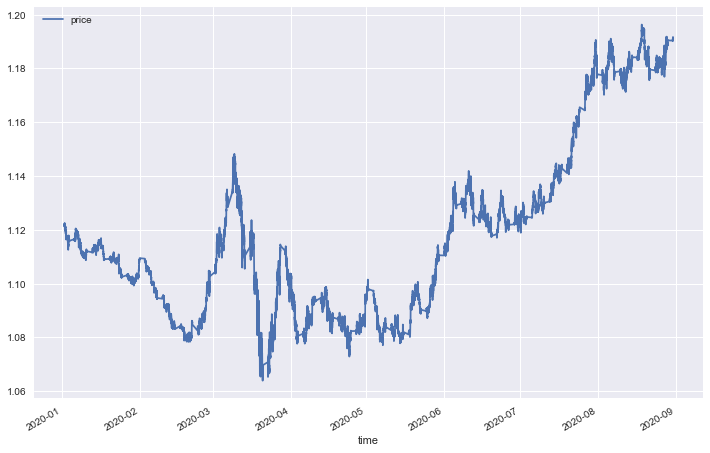

In [34]:
data.plot(figsize=(12,8))
plt.show()

In [35]:
data

,price
time,
2020-01-01 22:00:00+00:00,1.121325
2020-01-01 22:05:00+00:00,1.121250
2020-01-01 22:10:00+00:00,1.121250
2020-01-01 22:15:00+00:00,1.121460
2020-01-01 22:20:00+00:00,1.121540
...,...
2020-08-30 23:35:00+00:00,1.190895
2020-08-30 23:40:00+00:00,1.191240
2020-08-30 23:45:00+00:00,1.191515


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49367 entries, 2020-01-01 22:00:00+00:00 to 2020-08-30 23:55:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   49367 non-null  float64
dtypes: float64(1)
memory usage: 771.4 KB


In [6]:
data["returns"] = np.log(data.div(data.shift(1)))

In [7]:
lags = 5

In [8]:
cols = []
for lag in range(1, lags+1):
    col = "lag{}".format(lag)
    data[col] = data["returns"].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [9]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048
...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [10]:
cols

['lag1', 'lag2', 'lag3', 'lag4', 'lag5']

In [12]:
lm = LinearRegression(fit_intercept=True)

In [13]:
lm.fit(data[cols], data["returns"])

LinearRegression()

In [14]:
lm.coef_

array([-0.03358358, -0.00243139,  0.00365238, -0.00366896, -0.00360391])

In [15]:
lm.intercept_

-3.2782924419964445e-07

In [16]:
data["pred"] = lm.predict(data[cols].values)

In [17]:
data["pred"] = np.sign(data["pred"])

In [18]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0


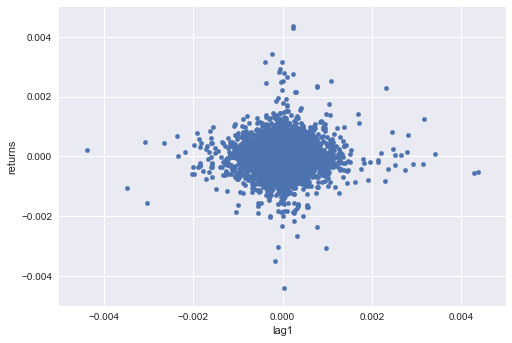

In [16]:
data.iloc[:, -2:].plot(kind="scatter", x="lag1", y="returns")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.show()

In [19]:
data["pred"].value_counts()

-1.0    39610
 1.0    34104
Name: pred, dtype: int64

In [24]:
hits = np.sign(data["returns"] * data["pred"]).value_counts()

In [25]:
hits

 1.0    37500
-1.0    34268
 0.0     1946
dtype: int64

In [26]:
hit_ratio = [hits[1.0]/ sum(hits)]

In [27]:
hit_ratio

[0.5087229020267521]

In [28]:
###############
##############
## TESTING ##
############
###########

In [29]:
data['strategy'] = data['pred'] * data['returns']

In [30]:
data['creturns'] = data['returns'].cumsum().apply(np.exp)
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

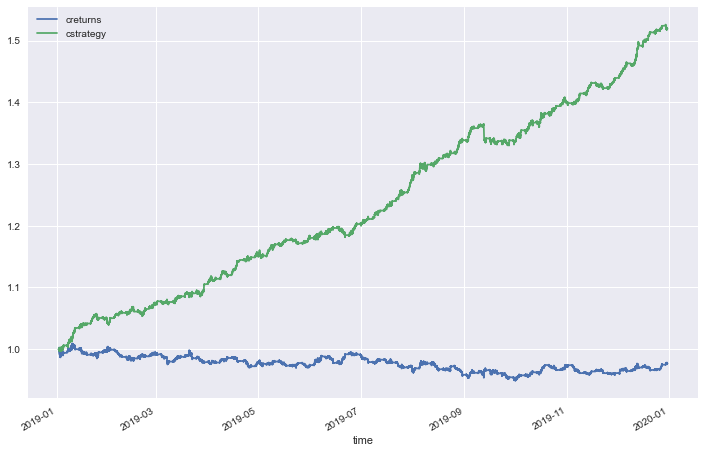

In [31]:
data[['creturns', 'cstrategy']].plot(figsize=(12,8))
plt.show()

In [32]:
# Forward test

In [37]:
test = pd.read_csv("/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/github/AlgoTrading/Part3_Materials/test_set.csv", parse_dates=["time"], index_col="time")

In [38]:
test["returns"] = np.log(test.div(test.shift(1)))

In [39]:
lags = 5

In [41]:
cols = []
for lag in range(1, lags+1):
    col = "lag{}".format(lag)
    test[col] = test["returns"].shift(lag)
    cols.append(col)
test.dropna(inplace=True)

In [42]:
test["pred"] = lm.predict(test[cols].values)

In [43]:
test

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.172394e-06
2020-01-01 22:45:00+00:00,1.121555,0.000031,0.000004,-0.000022,0.000071,0.000187,0.000000,-8.499182e-07
2020-01-01 22:50:00+00:00,1.121550,-0.000004,0.000031,0.000004,-0.000022,0.000071,0.000187,-2.404767e-06
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-0.000004,0.000031,0.000004,-0.000022,0.000071,-4.129965e-07
2020-01-01 23:00:00+00:00,1.121915,0.000357,-0.000031,-0.000004,0.000031,0.000004,-0.000022,9.090211e-07
...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.000092,0.000298,0.000046,0.000000,-0.000151,2.762520e-06
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.000080,-0.000092,0.000298,0.000046,0.000000,3.494904e-06
2020-08-30 23:45:00+00:00,1.191515,0.000231,0.000290,-0.000080,-0.000092,0.000298,0.000046,-1.145903e-05


In [45]:
test["pred"] = np.sign(test["pred"])

In [46]:
test["pred"].value_counts()

-1.0    26143
 1.0    23218
Name: pred, dtype: int64

In [55]:
hits_pred = np.sign(test["returns"] * test["pred"]).value_counts()

In [56]:
hits_pred

 1.0    24998
-1.0    23756
 0.0      607
dtype: int64

In [57]:
hit_ratio_pred = [hits_pred[1.0]/ sum(hits_pred)]

In [58]:
hit_ratio_pred

[0.5064322035615162]

In [59]:
test['strategy'] = test['pred'] * test['returns']

In [60]:
test['creturns'] = test['returns'].cumsum().apply(np.exp)
test['cstrategy'] = test['strategy'].cumsum().apply(np.exp)

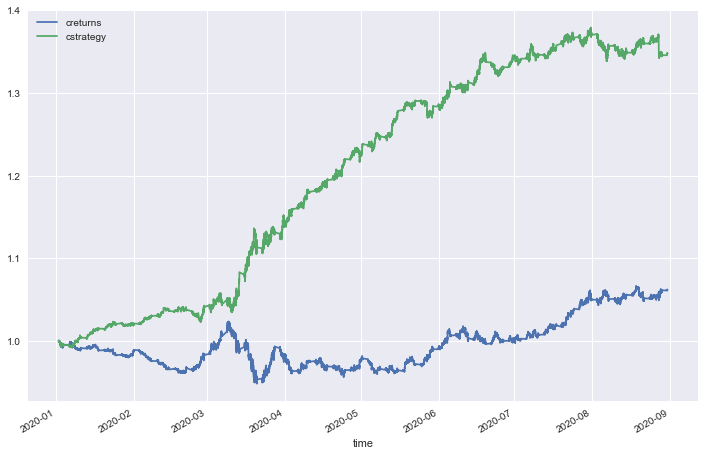

In [61]:
test[['creturns', 'cstrategy']].plot(figsize=(12,8))
plt.show()